<a href="https://colab.research.google.com/github/Muppidathe/ml_project/blob/master/utest_ttest_chi2test_adaboostclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [8]:
df=pd.read_csv('train (1).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
len(df['Ticket'].unique())

681

In [10]:
df=df.drop(columns=['Cabin','PassengerId','Name','Ticket'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [33]:
df.duplicated().sum()

np.int64(15)

In [35]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  876 non-null    int64  
 1   Pclass    876 non-null    int64  
 2   Sex       876 non-null    object 
 3   Age       711 non-null    float64
 4   SibSp     876 non-null    int64  
 5   Parch     876 non-null    int64  
 6   Ticket    876 non-null    object 
 7   Fare      876 non-null    float64
 8   Embarked  874 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 68.4+ KB


In [36]:
df['Survived'].value_counts()

,count
Survived,
0,540
1,336


# Feture selection column Wise

# Pclass

<Axes: xlabel='Pclass', ylabel='Count'>

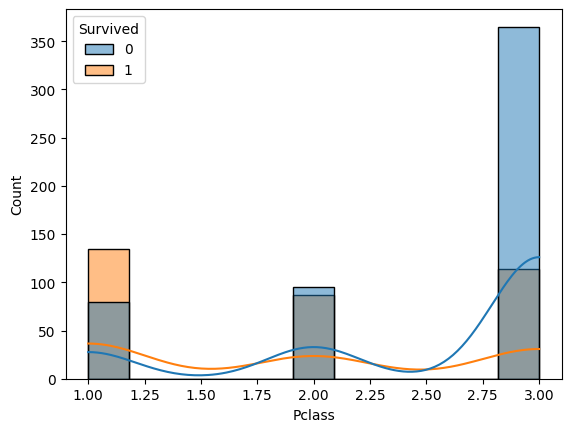

In [56]:
import seaborn as sns
sns.histplot(data=df,x='Pclass',hue='Survived',kde=True)

In [43]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['Pclass'], df['Survived'])
print(contingency)
chi2, p, dof, expected = chi2_contingency(contingency)
if p<.05:
  print('there are some relationship we can use pclass')
else:
  print('there are no relationship we can\'t use pclass')

Survived    0    1
Pclass            
1          80  135
2          95   87
3         365  114
there are some relationship we can use pclass


# Sex

In [55]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency)
if p<.05:
  print('there are some relationship we can use Sex')
else:
  print('there are no relationship we can\'t use Sex')

there are some relationship we can use Sex


# Age

<Axes: xlabel='Age', ylabel='Count'>

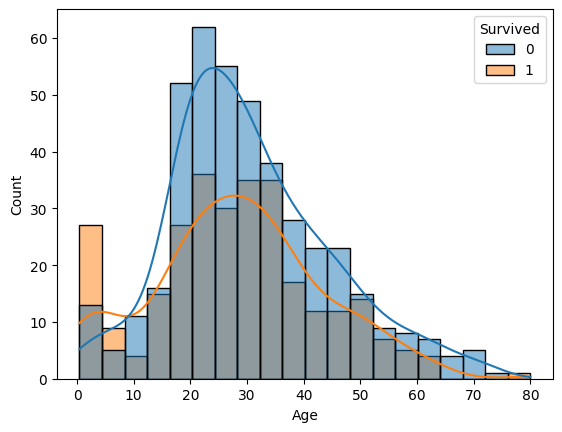

In [24]:
sns.histplot(data=df,x='Age',hue='Survived',kde=True)

In [41]:
from scipy.stats import ttest_ind

# Example: Compare 'Age' of survived vs not survived
group1 = df[df['Survived'] == 0]['Age'].dropna()
group2 = df[df['Survived'] == 1]['Age'].dropna()

stat, p = ttest_ind(group1, group2)
if p < 0.05:
    print("we can use age")
else:
    print("we can't use age")

we can use age


# sibsp

<Axes: xlabel='SibSp', ylabel='Count'>

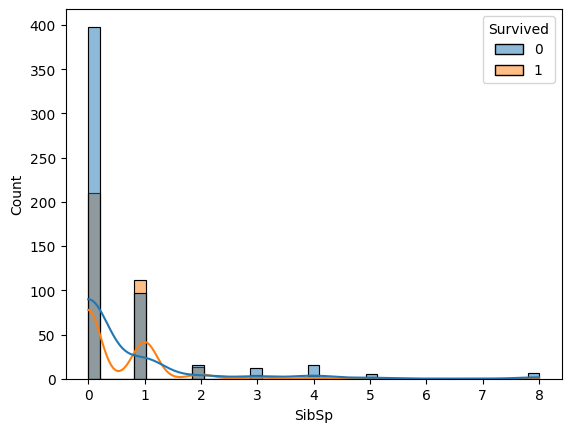

In [28]:
sns.histplot(data=df,x='SibSp',hue='Survived',kde=True)

In [42]:
from scipy.stats import chi2_contingency
contingency=pd.crosstab(df['Survived'],df['SibSp'])
chi2, p, dof, expected = chi2_contingency(contingency)
if p<.05:
  print('there are some relationship we can use SibSp')
else:
  print('there are no relationship we can\'t use SibSp')

there are some relationship we can use SibSp


# parch

<Axes: xlabel='Parch', ylabel='Count'>

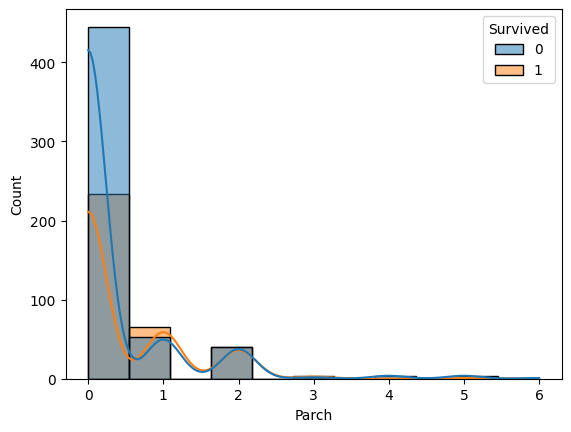

In [26]:
sns.histplot(data=df,x='Parch',hue='Survived',kde=True)

In [46]:
from scipy.stats import chi2_contingency
contingency=pd.crosstab(df['Survived'],df['Parch'])
chi2, p, dof, expected = chi2_contingency(contingency)
if p<.05:
  print('there are some relationship we can use parch')
else:
  print('there are no relationship we can\'t use parch')

there are some relationship we can use parch


# Fare

<Axes: xlabel='Fare', ylabel='Count'>

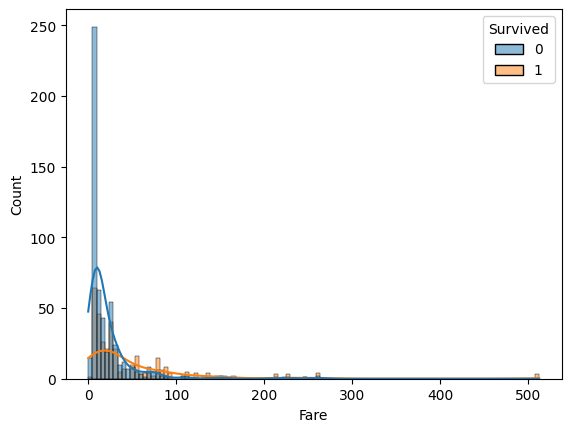

In [29]:
sns.histplot(data=df,x='Fare',hue='Survived',kde=True)

In [47]:
from scipy.stats import mannwhitneyu

# Example: Compare Age for Survived vs Not Survived
group1 = df[df['Survived'] == 0]['Fare'].dropna()
group2 = df[df['Survived'] == 1]['Fare'].dropna()

stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
if p<.05:
  print('We can use Fare')
else:
  print('we can\'t use fare')

We can use Fare


# embarked

<Axes: xlabel='Embarked', ylabel='Count'>

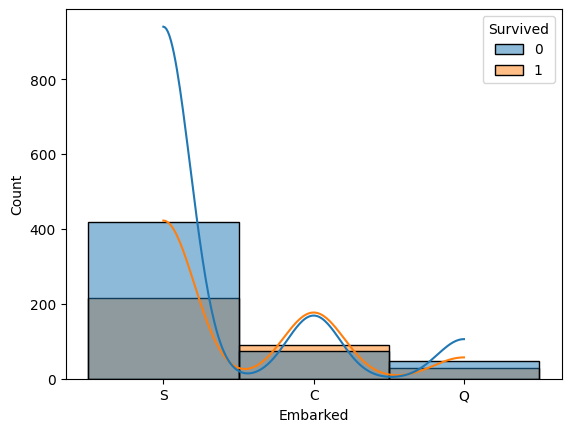

In [54]:
sns.histplot(data=df,x='Embarked',hue='Survived',kde=True)

In [53]:
from scipy.stats import chi2_contingency
contingency=pd.crosstab(df['Survived'],df['Embarked'])
chi2, p, dof, expected = chi2_contingency(contingency)
if p<.05:
  print('there are some relationship we can use Embarked')
else:
  print('there are no relationship we can\'t use Embarked')

there are some relationship we can use Embarked


<Axes: xlabel='Ticket', ylabel='Count'>

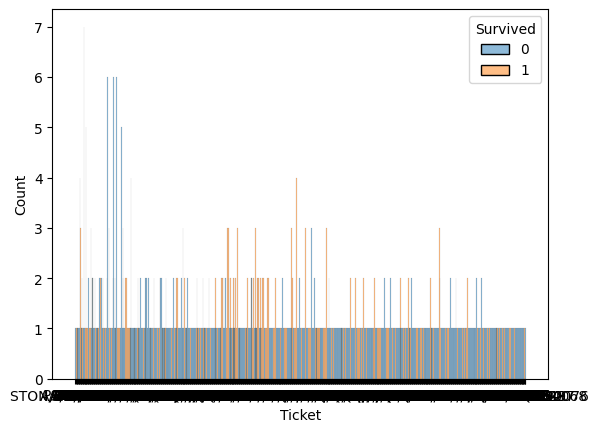

In [52]:
import seaborn as sns
sns.histplot(data=df,x='Ticket',hue='Survived')

In [57]:
df=df.drop(columns=['Ticket'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  876 non-null    int64  
 1   Pclass    876 non-null    int64  
 2   Sex       876 non-null    object 
 3   Age       711 non-null    float64
 4   SibSp     876 non-null    int64  
 5   Parch     876 non-null    int64  
 6   Fare      876 non-null    float64
 7   Embarked  874 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 61.6+ KB


In [58]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [78]:
cat_col=x.select_dtypes(include=['object']).columns
num_col=x.select_dtypes(include=['int','float']).columns
num_col

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [73]:
from imblearn.over_sampling import RandomOverSampler

smote = RandomOverSampler()
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

cat_pipeline=Pipeline([('imputing',SimpleImputer(strategy='most_frequent')),('encoding',OneHotEncoder())])
num_pipeline=Pipeline([('imputing',SimpleImputer(strategy='mean'))])

In [79]:
from sklearn.compose import ColumnTransformer
transformer=ColumnTransformer(transformers=[('cat_column_transforming',cat_pipeline,cat_col),('num_column_transforming',num_pipeline,num_col)])

In [80]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
final_pipe=Pipeline([('preprocessing',transformer),('model',model)])
final_pipe.fit(x_resampled,y_resampled)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_column_transforming',
                                                  Pipeline(steps=[('imputing',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  Index(['Sex', 'Embarked'], dtype='object')),
                                                 ('num_column_transforming',
                                                  Pipeline(steps=[('imputing',
                                                                   SimpleImputer())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))])),
                ('model', AdaBoostClassifier())])

In [81]:
from sklearn.metrics import accuracy_score,f1_score
res=final_pipe.predict(x_test)
test_accur=accuracy_score(y_test,res)
test_f1_0=f1_score(y_test,res,pos_label=0)
test_f1_1=f1_score(y_test,res,pos_label=1)
print('test accuracy ',test_accur)
print(' test f1 with respect top 0 ',test_f1_0)
print(' test f1 with respect top 1 ',test_f1_1)

test accuracy  0.7727272727272727
 test f1 with respect top 0  0.7959183673469388
 test f1 with respect top 1  0.7435897435897436
